# 1 RNN

In [1]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv("/content/SPAM text message 20170820 - Data.csv")

In [3]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [5]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
data shape:  (5572, 500)


In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - acc: 0.8444 - loss: 0.4364 - val_acc: 0.9619 - val_loss: 0.1988
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - acc: 0.9718 - loss: 0.1488 - val_acc: 0.9765 - val_loss: 0.0955
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - acc: 0.9756 - loss: 0.0896 - val_acc: 0.9765 - val_loss: 0.0738
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - acc: 0.9807 - loss: 0.0655 - val_acc: 0.9809 - val_loss: 0.0594
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - acc: 0.9873 - loss: 0.0407 - val_acc: 0.9865 - val_loss: 0.0556
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - acc: 0.9922 - loss: 0.0322 - val_acc: 0.9798 - val_loss: 0.0753
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - acc: 0.9938 - loss: 0.0250 - val_acc: 0.9865 - val_loss: 0.0505
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - acc: 0.9946 - loss: 0.0223 - val_acc: 0.9809 - val_loss: 0.0634
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step -

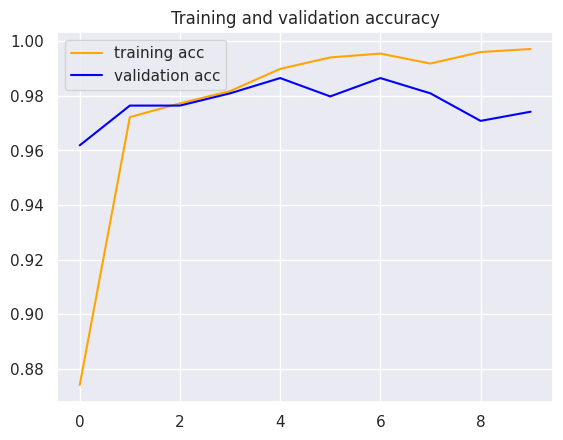

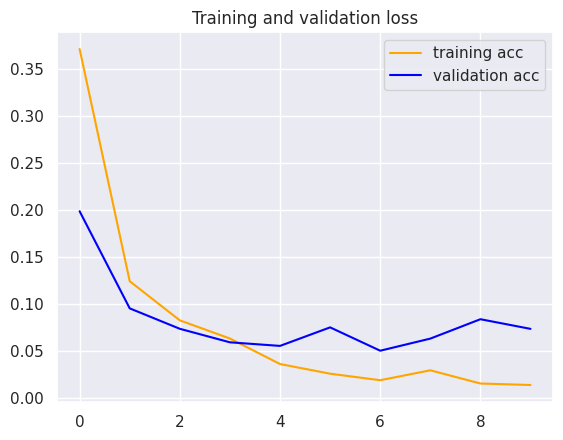

In [7]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get predictions
pred = np.argmax(model.predict(texts_test), axis=-1)

# Evaluate the model
acc = model.evaluate(texts_test, y_test)

# Get probability predictions
proba_rnn = model.predict(texts_test)  # No need for `predict_proba()`, `predict()` already returns probabilities

# Print results
print("Test loss is {0:.2f}, accuracy is {1:.2f}".format(acc[0], acc[1]))
print(confusion_matrix(pred, y_test))


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.9774 - loss: 0.0747
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Test loss is 0.10, accuracy is 0.97
[[961 154]
 [  0   0]]


# LTSM

In [10]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 268ms/step - acc: 0.8460 - loss: 0.4152 - val_acc: 0.9529 - val_loss: 0.1783
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - acc: 0.9662 - loss: 0.1467 - val_acc: 0.9809 - val_loss: 0.0881
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 262ms/step - acc: 0.9825 - loss: 0.0745 - val_acc: 0.9798 - val_loss: 0.0640
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 252ms/step - acc: 0.9846 - loss: 0.0570 - val_acc: 0.9776 - val_loss: 0.0663
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - acc: 0.9897 - loss: 0.0368 - val_acc: 0.9888 - val_loss: 0.0451
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - acc: 0.9945 - loss: 0.0284 - val_acc: 0.9832 - val_loss: 0.0517
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - acc: 0.9913 - loss: 0.0361 - val_acc: 0.9877 - val_loss: 0.0483
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - acc: 0.9966 - loss: 0.0161 - val_acc: 0.9865 - val_loss: 0.0551
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/

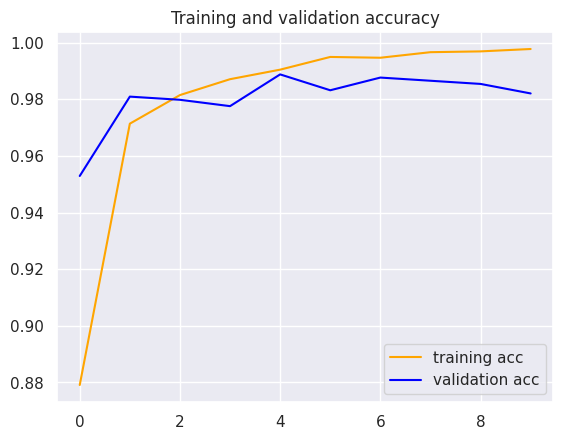

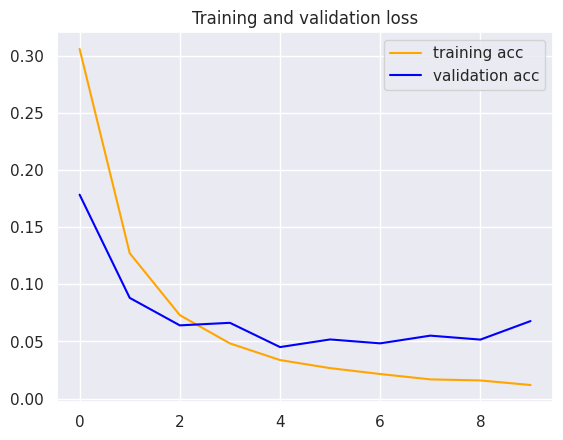

In [11]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get predictions
pred = np.argmax(model.predict(texts_test), axis=-1)

# Evaluate the model
acc = model.evaluate(texts_test, y_test)

# Get probability predictions
proba_lstm = model.predict(texts_test)  # No need for predict_proba(), predict() gives probabilities

# Print results
print("Test loss is {0:.2f}, accuracy is {1:.2f}".format(acc[0], acc[1]))
print(confusion_matrix(pred, y_test))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.9846 - loss: 0.0727
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
Test loss is 0.09, accuracy is 0.98
[[961 154]
 [  0   0]]


# Ensemble method (combining RNN and LTSM)

In [14]:
ensemble_proba = 0.3 * proba_rnn + 0.7 * proba_lstm

In [15]:
ensemble_proba[:5]

array([[0.00115998],
       [0.00159572],
       [0.00128298],
       [0.00052402],
       [0.00243451]], dtype=float32)

In [16]:
ensemble_class = np.array([1 if i >= 0.5 else 0 for i in ensemble_proba])

In [17]:
ensemble_class[:5]

array([0, 0, 0, 0, 0])

In [18]:
print(confusion_matrix(pred, y_test))

[[961 154]
 [  0   0]]
